In [1]:
import datetime
import numpy as np
import pandas as pd
from numpy import random as npr

from modules import utils

In [2]:
SEED = 2021
REAL_DATASET_SAMPLE_SIZE = 1
N_CHUNKS = 10 
npr.seed(SEED)

In [3]:
rating_df = pd.read_csv("data/rating.csv")
rating_df = rating_df.sample(frac=REAL_DATASET_SAMPLE_SIZE)
rating_df["rating"] = (rating_df["rating"] * 5).astype("int")
rating_df

,user_id,item_id,rating,timestamp
16334,128,49,5,977434870
440002,2689,3238,4,973344429
296395,1757,3243,2,974790728
170347,1084,699,3,974941318
281936,1690,1132,3,974775705
...,...,...,...,...
133741,864,2400,3,975281400
476288,2925,218,4,1006658564
923705,5576,3451,1,959289879
224597,1357,575,4,974769790


In [4]:
def evaluate(df):
    errors = {
        "svd": utils.evaluate_svd(df.copy(), rating_scale=(0, 5)),
        "knn": utils.evaluate_knn(df.copy(), rating_scale=(0, 5)),
        "autorec": utils.evaluate_autorec(df.copy())
    }
    return errors

In [5]:
%%time
npr.seed(SEED)
parts = np.array_split(rating_df, N_CHUNKS)
error_logs = []


for i, part in enumerate(parts):
    start = datetime.datetime.utcnow()    
    part = utils.map_idx_to_matrix_indices(part)
    error = evaluate(part)
    error_logs.append({"part": i, "error": error})
    duration = datetime.datetime.utcnow() - start
    print(f"Part {i} processed within {duration}")
    


RMSE: 0.9500
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0140
Load data finished. Number of users: 5961 Number of items: 3317
IAutoRec.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2021-08-10 06:43:12.213700: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-08-10 06:43:12.219468: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2494140000 Hz
2021-08-10 06:43:12.220511: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc3d0000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-08-10 06:43:12.220537: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-08-10 06:43:12.222636: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-10 06:43:12.222656: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-10 06:43:12.222676: I tenso

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Network built
Epoch: 0000; RMSE:2.1628071081535802; MAE:1.9121288485454226
Epoch: 0003; RMSE:1.2255916868437837; MAE:0.9611901874761252
Epoch: 0006; RMSE:1.089356332506832; MAE:0.8677742184395313
Epoch: 0009; RMSE:1.062605880284649; MAE:0.840357035195897
Epoch: 0012; RMSE:1.0308390824901479; MAE:0.8095041212970893
Epoch: 0015; RMSE:1.0141834833857026; MAE:0.7967980767700245
Epoch: 0018; RMSE:1.006419543108266; MAE:0.7915610683855475
Epoch: 0021; RMSE:0.9998252560769543; MAE:0.7859762845175426
Epoch: 0024; RMSE:0.9949703086415954; MAE:0.7816893813290338
Epoch: 0027; RMSE:0.994350258975324; MAE:0.7811970891463483
Epoch: 0030; RMSE:0.9907180418002501; MAE:0.7793110399172158
Epoch: 0033; RMSE:0.9889952755669613; MAE:0.7770746104282273
Epoch: 0036; RMSE:0.9891326053086504; MAE:0.777025390121008
Epoch: 0039; RMSE:0.9878291296665271; MAE:0.7766616112428238
Epoch: 0042; RMSE:0.9873553894284656; MAE:0.7757875282040506
Epoch: 0045; RMSE:0.986928497829807; MAE:0.7763659034986458
Epoch: 0048; RMSE

Epoch: 0405; RMSE:1.0883686668430337; MAE:0.858282751260556
Epoch: 0408; RMSE:1.0851390147736506; MAE:0.854871136250016
Epoch: 0411; RMSE:1.0891973702982094; MAE:0.8583363056636144
Epoch: 0414; RMSE:1.0932634927905525; MAE:0.8627625146398831
Epoch: 0417; RMSE:1.0915030511322872; MAE:0.8601007756754117
Epoch: 0420; RMSE:1.091254449008722; MAE:0.8609801614721388
Epoch: 0423; RMSE:1.092512961324566; MAE:0.8615189198143185
Epoch: 0426; RMSE:1.0931613159024263; MAE:0.8618049182407601
Epoch: 0429; RMSE:1.090845071793098; MAE:0.8608907894967179
Epoch: 0432; RMSE:1.0914024711913988; MAE:0.8606401334204471
Epoch: 0435; RMSE:1.0906847134385256; MAE:0.8595538541946851
Epoch: 0438; RMSE:1.0936139460375573; MAE:0.8623686257139331
Epoch: 0441; RMSE:1.092564717736021; MAE:0.8616164312954675
Epoch: 0444; RMSE:1.0971719011832395; MAE:0.8667929137672157
Epoch: 0447; RMSE:1.0929913250925354; MAE:0.8617147318835157
Epoch: 0450; RMSE:1.0910734476661632; MAE:0.8590871027562946
Epoch: 0453; RMSE:1.0970289243

Epoch: 0300; RMSE:1.0774119951729064; MAE:0.8490705312317257
Epoch: 0303; RMSE:1.0796703974133701; MAE:0.850931759819088
Epoch: 0306; RMSE:1.0713606736399515; MAE:0.8428490044278337
Epoch: 0309; RMSE:1.0789285700876208; MAE:0.8502410270070275
Epoch: 0312; RMSE:1.078413968070848; MAE:0.8493387548358939
Epoch: 0315; RMSE:1.0787037439054028; MAE:0.8486429826919589
Epoch: 0318; RMSE:1.080439684487907; MAE:0.8514879589550791
Epoch: 0321; RMSE:1.0812482747990928; MAE:0.8525150277863298
Epoch: 0324; RMSE:1.0785873200869451; MAE:0.8490283300080328
Epoch: 0327; RMSE:1.0796989212994095; MAE:0.8496735314325728
Epoch: 0330; RMSE:1.0839237145129124; MAE:0.8543931279957119
Epoch: 0333; RMSE:1.0837560547557086; MAE:0.8536617580129582
Epoch: 0336; RMSE:1.0843409751973978; MAE:0.8543242245548828
Epoch: 0339; RMSE:1.0786270360996737; MAE:0.8477396404711928
Epoch: 0342; RMSE:1.0882738588603436; MAE:0.8586827302983132
Epoch: 0345; RMSE:1.086306835352034; MAE:0.8574192780153336
Epoch: 0348; RMSE:1.08212030

Epoch: 0126; RMSE:1.01296121431438; MAE:0.7947801950082367
Epoch: 0129; RMSE:1.0131061981460125; MAE:0.7956076051225571
Epoch: 0132; RMSE:1.015716062479862; MAE:0.7975667821480635
Epoch: 0135; RMSE:1.0163776997132172; MAE:0.797818471910176
Epoch: 0138; RMSE:1.0169938178874502; MAE:0.7979956350824542
Epoch: 0141; RMSE:1.0182571502235782; MAE:0.7988104008963642
Epoch: 0144; RMSE:1.0185389844259145; MAE:0.7985414216698212
Epoch: 0147; RMSE:1.0199474327588065; MAE:0.8002410566186234
Epoch: 0150; RMSE:1.0203617840409573; MAE:0.8002451490200247
Epoch: 0153; RMSE:1.0214925148098262; MAE:0.8013896398752962
Epoch: 0156; RMSE:1.0217863038512793; MAE:0.8014764359707239
Epoch: 0159; RMSE:1.0216343420074896; MAE:0.8012239956536724
Epoch: 0162; RMSE:1.0244663758657284; MAE:0.8037399796219336
Epoch: 0165; RMSE:1.024713507853766; MAE:0.8046162418800845
Epoch: 0168; RMSE:1.0248585918403204; MAE:0.8035634168026436
Epoch: 0171; RMSE:1.0257144670917027; MAE:0.8050230741722908
Epoch: 0174; RMSE:1.028201469

Epoch: 0021; RMSE:0.9936378148655617; MAE:0.7790990277726055
Epoch: 0024; RMSE:0.9895915530938442; MAE:0.7755446233924728
Epoch: 0027; RMSE:0.9887710995608839; MAE:0.7749146789456826
Epoch: 0030; RMSE:0.9877045513839223; MAE:0.7736144706634366
Epoch: 0033; RMSE:0.9869315498079295; MAE:0.7736988589540041
Epoch: 0036; RMSE:0.9839578722710515; MAE:0.7708030907289268
Epoch: 0039; RMSE:0.9855238865734254; MAE:0.771012334858592
Epoch: 0042; RMSE:0.9843269258532928; MAE:0.770492494105964
Epoch: 0045; RMSE:0.9850085810851531; MAE:0.7709739571451758
Epoch: 0048; RMSE:0.9846228615539245; MAE:0.7703162426982623
Epoch: 0051; RMSE:0.9859897043710055; MAE:0.7721084811355843
Epoch: 0054; RMSE:0.9862366152000803; MAE:0.7718902197138768
Epoch: 0057; RMSE:0.9872882518828249; MAE:0.7731643124305534
Epoch: 0060; RMSE:0.9886898993773123; MAE:0.7740707238093041
Epoch: 0063; RMSE:0.9893175728565599; MAE:0.7747962007687287
Epoch: 0066; RMSE:0.9915641336437123; MAE:0.7767880912818002
Epoch: 0069; RMSE:0.992383

Epoch: 0426; RMSE:1.0887810086465541; MAE:0.855281023487171
Epoch: 0429; RMSE:1.0865316991266813; MAE:0.8525256319427144
Epoch: 0432; RMSE:1.0854090864697472; MAE:0.8507157322081428
Epoch: 0435; RMSE:1.087965301481592; MAE:0.8539135330699281
Epoch: 0438; RMSE:1.0907744750460349; MAE:0.8562034624160408
Epoch: 0441; RMSE:1.0873217564258486; MAE:0.8530912978578672
Epoch: 0444; RMSE:1.0892233544865648; MAE:0.8559574491013546
Epoch: 0447; RMSE:1.090372530618906; MAE:0.856361197203848
Epoch: 0450; RMSE:1.0907563133201577; MAE:0.8567603153344217
Epoch: 0453; RMSE:1.0898525780605057; MAE:0.8551621602051176
Epoch: 0456; RMSE:1.093805704584788; MAE:0.859282847735516
Epoch: 0459; RMSE:1.0962284135517228; MAE:0.8608918870639057
Epoch: 0462; RMSE:1.090267613171784; MAE:0.8553727849440436
Epoch: 0465; RMSE:1.0870914101500184; MAE:0.8525966451083715
Epoch: 0468; RMSE:1.0915454815238337; MAE:0.855486201101699
Epoch: 0471; RMSE:1.0986821228594963; MAE:0.8645490982333962
Epoch: 0474; RMSE:1.094432124044

Epoch: 0357; RMSE:1.0788096245722958; MAE:0.8484515237910435
Epoch: 0360; RMSE:1.0754609624930878; MAE:0.8437633077034068
Epoch: 0363; RMSE:1.0730310281723645; MAE:0.8406942367174305
Epoch: 0366; RMSE:1.077954876299036; MAE:0.8450898353921465
Epoch: 0369; RMSE:1.076500914874292; MAE:0.8446416547580808
Epoch: 0372; RMSE:1.0745138796919773; MAE:0.8427636858702123
Epoch: 0375; RMSE:1.078625944556837; MAE:0.8468139429241368
Epoch: 0378; RMSE:1.0757581561103629; MAE:0.843854212151579
Epoch: 0381; RMSE:1.079570091816418; MAE:0.8487917669329467
Epoch: 0384; RMSE:1.0800119017017826; MAE:0.8477370251130626
Epoch: 0387; RMSE:1.0781389051310628; MAE:0.8453725377492965
Epoch: 0390; RMSE:1.0799688271405417; MAE:0.8470532107418648
Epoch: 0393; RMSE:1.082236651243801; MAE:0.8510041884748434
Epoch: 0396; RMSE:1.0792697951985797; MAE:0.8473411954348944
Epoch: 0399; RMSE:1.0832401429234544; MAE:0.8508728706553623
Epoch: 0402; RMSE:1.0821469054587138; MAE:0.8492617584182951
Epoch: 0405; RMSE:1.0786249630

Epoch: 0252; RMSE:1.0584091884122768; MAE:0.8347265369435755
Epoch: 0255; RMSE:1.0573471618699444; MAE:0.832886421006609
Epoch: 0258; RMSE:1.057034732138987; MAE:0.8325297997224012
Epoch: 0261; RMSE:1.0613831597736927; MAE:0.8374266162155528
Epoch: 0264; RMSE:1.0594785187540647; MAE:0.8349676005019573
Epoch: 0267; RMSE:1.0615365821591685; MAE:0.8368975532138524
Epoch: 0270; RMSE:1.0599492157896828; MAE:0.8349152863850471
Epoch: 0273; RMSE:1.063148913231169; MAE:0.8376483493193438
Epoch: 0276; RMSE:1.061638681434301; MAE:0.8362636344423653
Epoch: 0279; RMSE:1.06318364017381; MAE:0.8375738085687108
Epoch: 0282; RMSE:1.065076209483588; MAE:0.8394925420809483
Epoch: 0285; RMSE:1.061455825966864; MAE:0.8349919838037593
Epoch: 0288; RMSE:1.0683567847191375; MAE:0.8425617811840534
Epoch: 0291; RMSE:1.0655443484072467; MAE:0.8399726619850965
Epoch: 0294; RMSE:1.0668164984774724; MAE:0.8411051802130416
Epoch: 0297; RMSE:1.0670533042411086; MAE:0.8416451704864708
Epoch: 0300; RMSE:1.067732206622

Epoch: 0147; RMSE:1.0163981103372197; MAE:0.8018870578396129
Epoch: 0150; RMSE:1.0161697652074735; MAE:0.8017202233812215
Epoch: 0153; RMSE:1.0188176601516157; MAE:0.8041306400932083
Epoch: 0156; RMSE:1.0192288802646612; MAE:0.8046213745511003
Epoch: 0159; RMSE:1.022421109245998; MAE:0.8077619483338753
Epoch: 0162; RMSE:1.0213416380723286; MAE:0.8061349941952867
Epoch: 0165; RMSE:1.0211803316114632; MAE:0.8063912998341559
Epoch: 0168; RMSE:1.02346914355557; MAE:0.808537024312738
Epoch: 0171; RMSE:1.0241064805704845; MAE:0.8090063185336268
Epoch: 0174; RMSE:1.0238795254351194; MAE:0.8089564006178988
Epoch: 0177; RMSE:1.0262975465569115; MAE:0.8104306447210239
Epoch: 0180; RMSE:1.0263532359684113; MAE:0.8108762656931718
Epoch: 0183; RMSE:1.0270684149820197; MAE:0.8108918707568116
Epoch: 0186; RMSE:1.0267605317491892; MAE:0.8102070188857673
Epoch: 0189; RMSE:1.028055738555181; MAE:0.812379981196909
Epoch: 0192; RMSE:1.0291137045621028; MAE:0.8134411612637331
Epoch: 0195; RMSE:1.0285990709

Epoch: 0096; RMSE:1.008104939558051; MAE:0.7905550553889538
Epoch: 0099; RMSE:1.009349533729362; MAE:0.7913899115076073
Epoch: 0102; RMSE:1.0109606815120427; MAE:0.7927989304101271
Epoch: 0105; RMSE:1.0125392776807478; MAE:0.7946393389987911
Epoch: 0108; RMSE:1.013310912390189; MAE:0.7950479931983954
Epoch: 0111; RMSE:1.0133707083492385; MAE:0.7950857683972841
Epoch: 0114; RMSE:1.0153385941786783; MAE:0.7962482728273172
Epoch: 0117; RMSE:1.0175726150034499; MAE:0.7991615079497314
Epoch: 0162; RMSE:1.0303396128065712; MAE:0.8084089896796877
Epoch: 0165; RMSE:1.0335732465924807; MAE:0.8118720695079952
Epoch: 0168; RMSE:1.0347472962950084; MAE:0.8129542302931947
Epoch: 0171; RMSE:1.0342980150004393; MAE:0.8125290238794908
Epoch: 0174; RMSE:1.035585917817397; MAE:0.8137989294905438
Epoch: 0177; RMSE:1.0370890941429438; MAE:0.8151077119927114
Epoch: 0180; RMSE:1.0390052697376682; MAE:0.8166717051649522
Epoch: 0183; RMSE:1.0379807523220792; MAE:0.8154048566959908
Epoch: 0186; RMSE:1.03803130

Epoch: 0033; RMSE:1.0054490414834518; MAE:0.7853864348498335
Epoch: 0036; RMSE:1.0031363942842912; MAE:0.7830659373380953
Epoch: 0039; RMSE:1.0036312147549566; MAE:0.7827870070323552
Epoch: 0042; RMSE:1.002002192677103; MAE:0.7815707165808894
Epoch: 0045; RMSE:1.0016006583177846; MAE:0.7818757916764398
Epoch: 0048; RMSE:1.0018490556715327; MAE:0.7813298095566076
Epoch: 0051; RMSE:1.0025559586016695; MAE:0.7816823838032354
Epoch: 0054; RMSE:1.0035587649586786; MAE:0.7830385265572778
Epoch: 0057; RMSE:1.004762088548906; MAE:0.7840641928103015
Epoch: 0060; RMSE:1.0053793765851515; MAE:0.7839482256343073
Epoch: 0063; RMSE:1.0067340990072209; MAE:0.7847644837541838
Epoch: 0066; RMSE:1.0067190956855177; MAE:0.7850103147864502
Epoch: 0069; RMSE:1.008295956204775; MAE:0.7864971046424953
Epoch: 0072; RMSE:1.0109962612644723; MAE:0.7883436911610109
Epoch: 0075; RMSE:1.011196390787612; MAE:0.788458107735351
Epoch: 0078; RMSE:1.0127374118341737; MAE:0.7901954019031139
Epoch: 0081; RMSE:1.013911891

In [6]:
error_logs

[{'part': 0,
  'error': {'svd': 0.9499511023674833,
   'knn': 1.0140324871217874,
   'autorec': 0.986928497829807}},
 {'part': 1,
  'error': {'svd': 0.9648521046355284,
   'knn': 1.0151515249969898,
   'autorec': 0.9952021829883979}},
 {'part': 2,
  'error': {'svd': 0.9451903625562988,
   'knn': 1.0258691999779488,
   'autorec': 0.9716770595013638}},
 {'part': 3,
  'error': {'svd': 0.9507387233947017,
   'knn': 1.0244987226322537,
   'autorec': 0.9817709647257585}},
 {'part': 4,
  'error': {'svd': 0.9584275162360992,
   'knn': 1.0177900957206307,
   'autorec': 0.9839578722710515}},
 {'part': 5,
  'error': {'svd': 0.9459697647385444,
   'knn': 1.0357260778283839,
   'autorec': 0.9883218383910002}},
 {'part': 6,
  'error': {'svd': 0.9464357354398978,
   'knn': 1.0176324670755532,
   'autorec': 0.9906737302728816}},
 {'part': 7,
  'error': {'svd': 0.9427979469447295,
   'knn': 1.0248974705886689,
   'autorec': 0.9797436807974984}},
 {'part': 8,
  'error': {'svd': 0.9544478650770061,
   'k

In [7]:
errors = []
for e in error_logs:
    for k, v in e["error"].items():
        errors.append({"part": e["part"], "error": v, "model": k})
    

In [8]:
error_df = pd.DataFrame(errors)
error_df

,part,error,model
0,0,0.949951,svd
1,0,1.014032,knn
2,0,0.986928,autorec
3,1,0.964852,svd
4,1,1.015152,knn
5,1,0.995202,autorec
6,2,0.945190,svd
7,2,1.025869,knn
8,2,0.971677,autorec
9,3,0.950739,svd


In [37]:
error_df.to_csv("./cache/find_best_chunks_results_0_5_rating_scale.csv", index=False)

<AxesSubplot:xlabel='part', ylabel='error'>

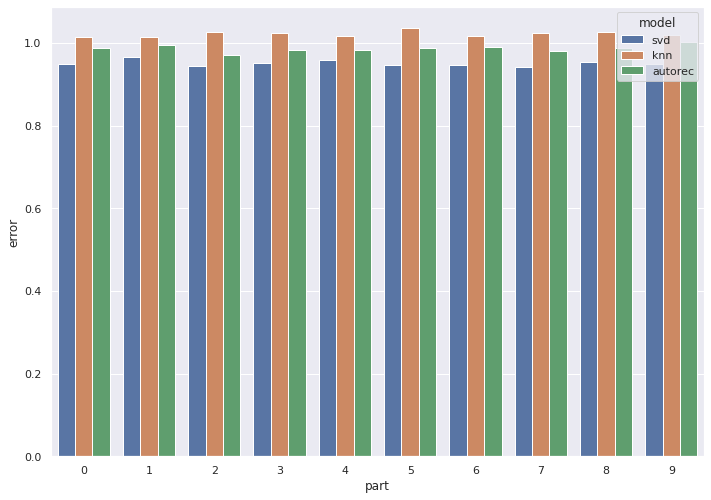

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=error_df, x="part", y="error", hue="model")